# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
# 1. Import yfinance and other necessary libraries
import yfinance as yf
import datetime


# Reading The Data

[*********************100%%**********************]  1 of 1 completed


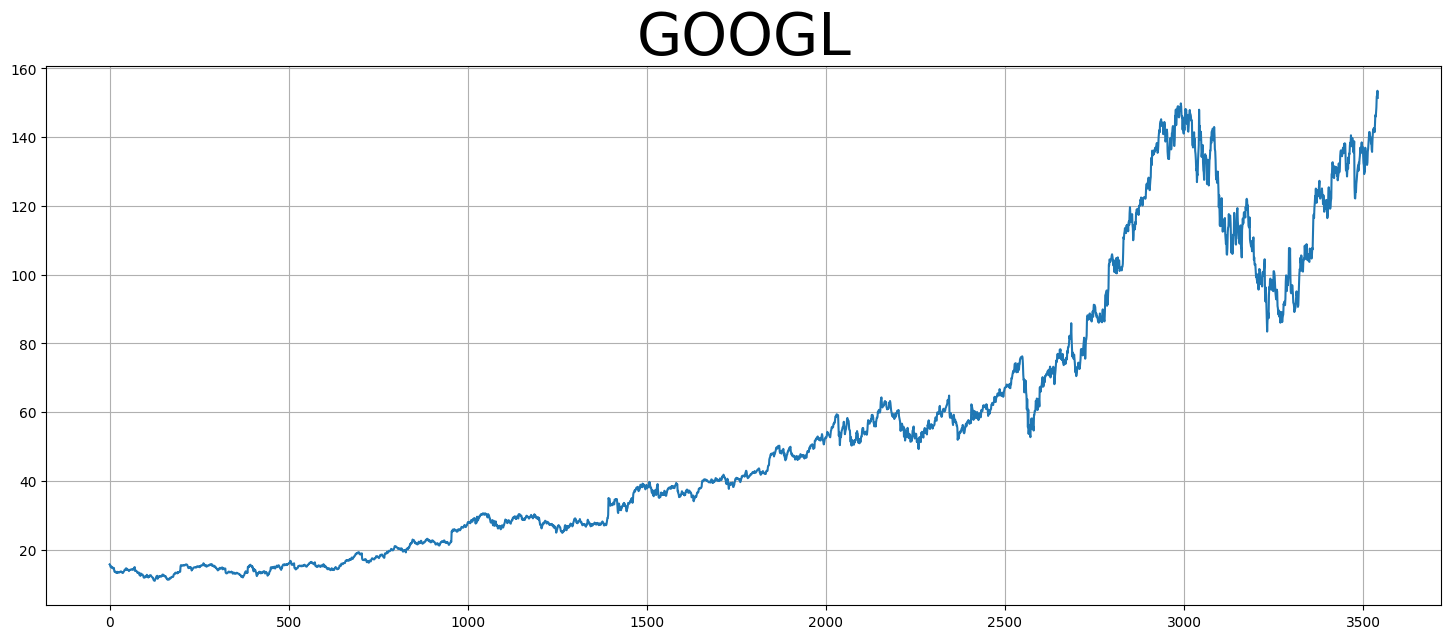

In [2]:
symb = "GOOGL"
# Define today's date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

df = yf.download(symb, start="2010-01-01", end=end_date, interval="1d")
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# RSI Indicator Visualizastion

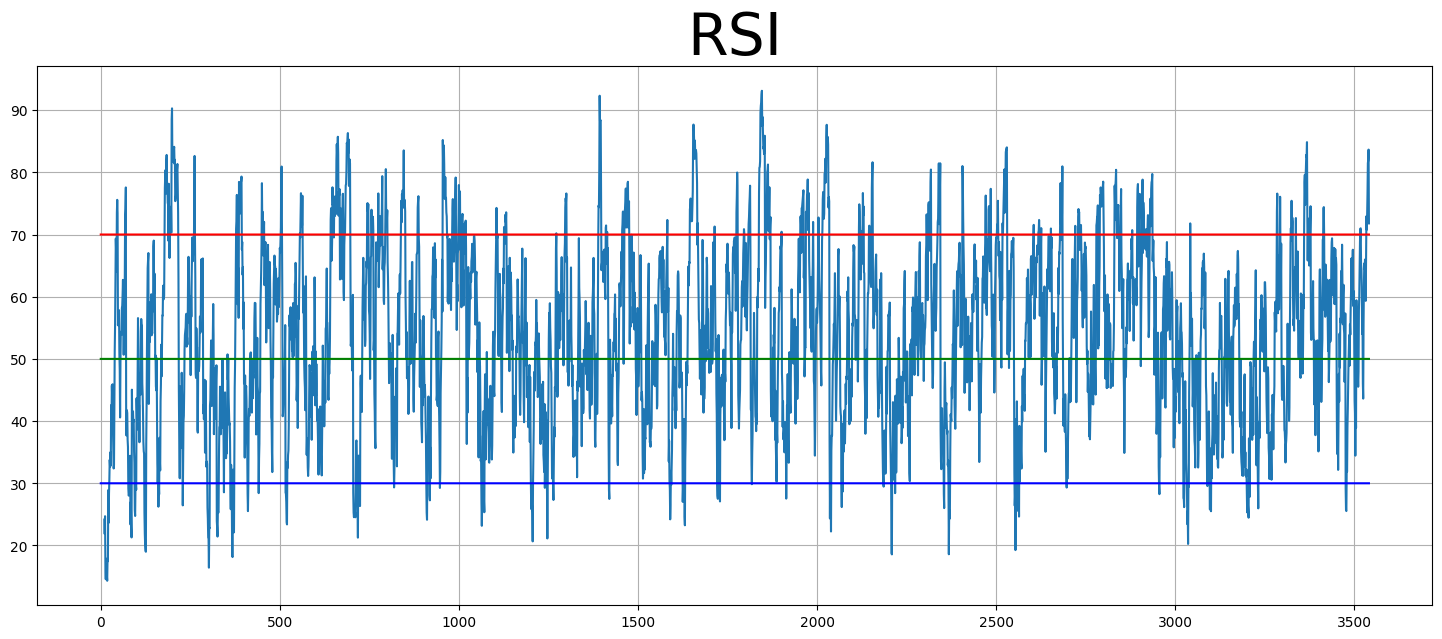

In [3]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)
df['rsi at 70'] = 70
df['rsi at 30'] = 30
df['rsi at 50'] = 50
plt.figure(figsize=(18,7))
plt.plot(df['rsi'] )
plt.plot(df['rsi at 70'],color='r')
plt.plot(df['rsi at 30'],color='b')
plt.plot(df['rsi at 50'],color='g')
plt.title('RSI',size=42)
plt.grid()
plt.show()

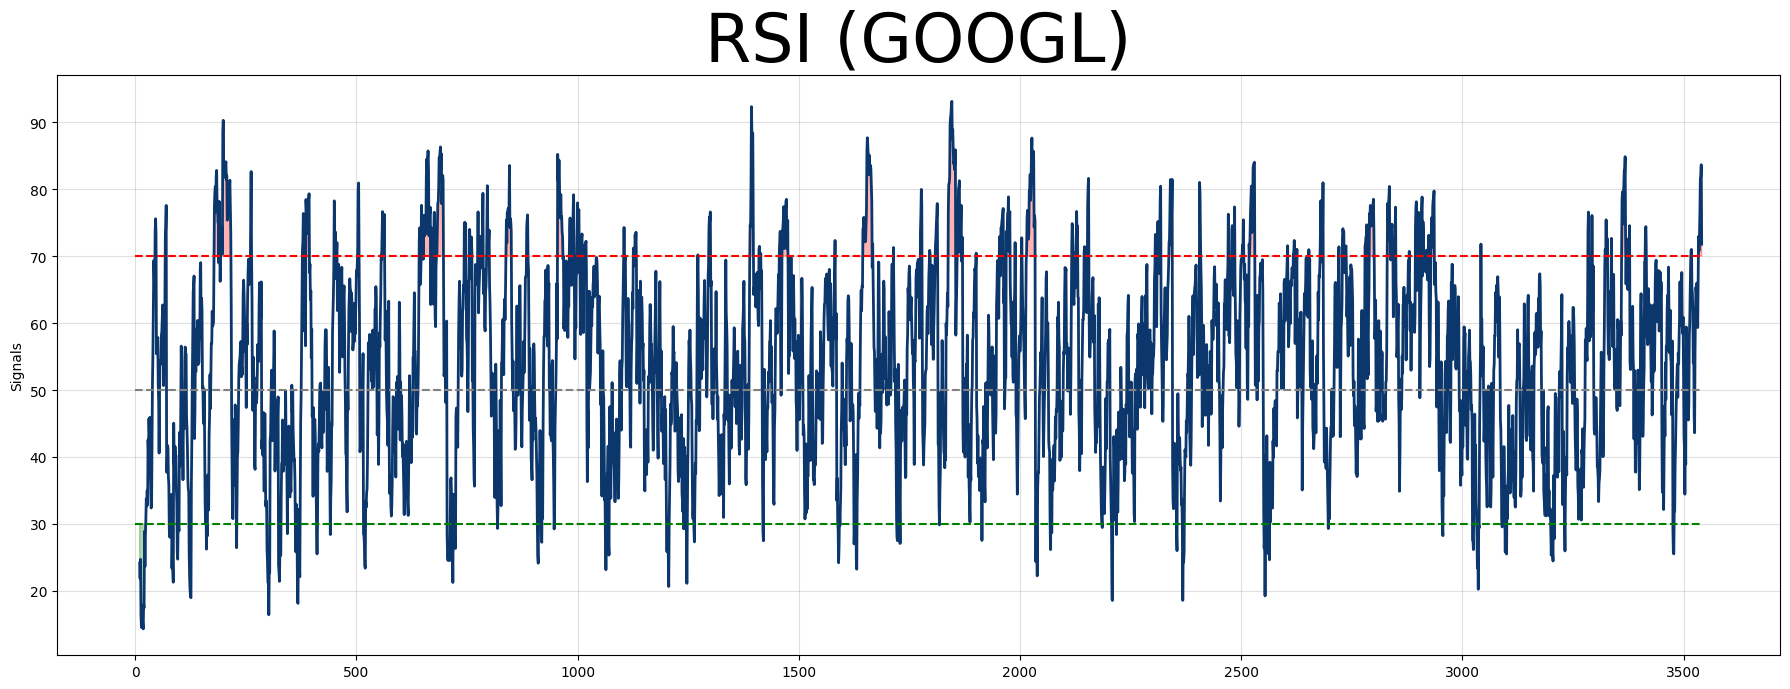

In [4]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)

plt.figure(figsize=(18,7))
plt.plot(df['rsi'], color='#0c376d', linewidth=2)
plt.hlines(70, xmin=df.index[0], xmax=df.index[-1], colors='red', linestyles='dashed')
plt.hlines(30, xmin=df.index[0], xmax=df.index[-1], colors='green', linestyles='dashed') 
plt.hlines(50, xmin=df.index[0], xmax=df.index[-1], colors='grey', linestyles='dashed')

plt.fill_between(df.index, df['rsi'], 70, where=(df['rsi'] >= 70), color='red', alpha=0.3)  
plt.fill_between(df.index, df['rsi'], 30, where=(df['rsi'] <= 30), color='green', alpha=0.3)

plt.gca().set(ylabel='Signals', xlabel='')  
plt.title('RSI (GOOGL)', fontsize=48)
plt.grid(which='major', axis='both', alpha=0.4)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 16   
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20   

plt.show()

# Empty Arrays

In [5]:

buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

# Decision Making Process


Profit = 49
Stop_loss = 66
PROFITIBLITY 42.608695652173914


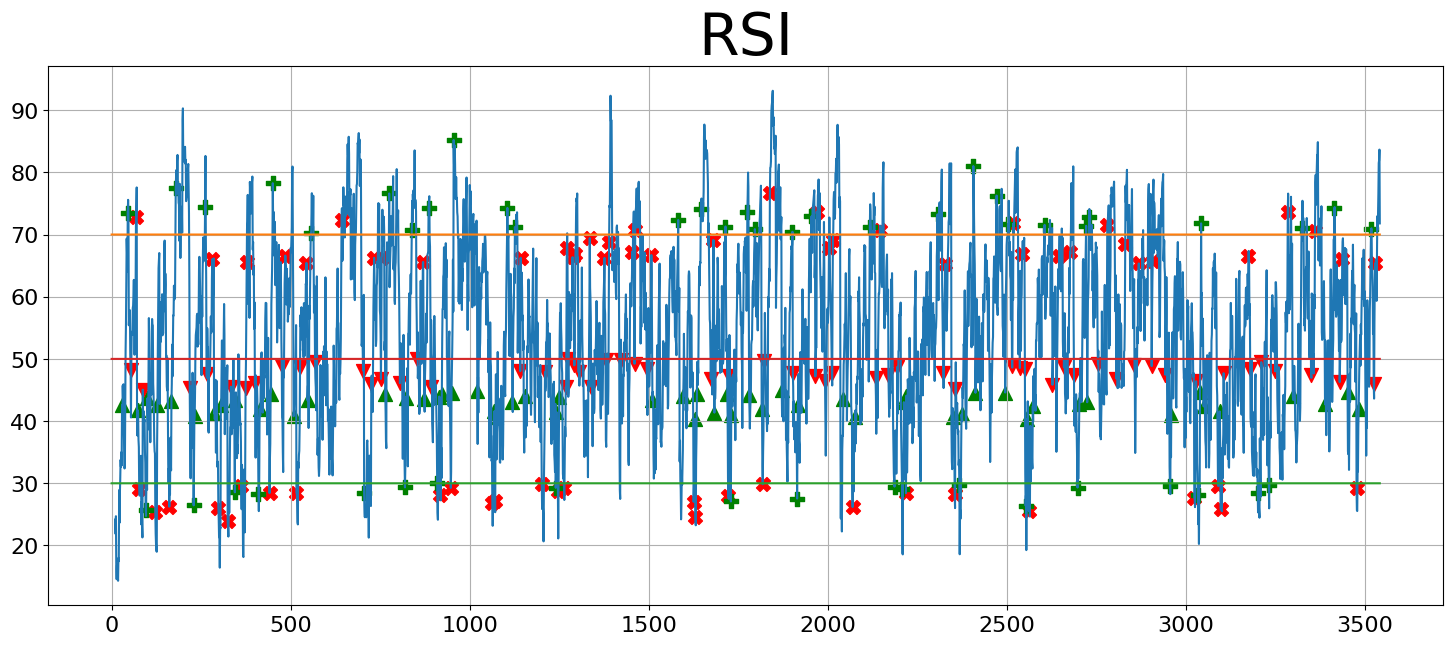

In [6]:

for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]<45 and df['rsi'][i]>=40 and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['rsi'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50 and df['rsi'][i]>45 and position_Sell!="Sell" and position_Buy!="Buy" :
        sell.append(df['rsi'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['rsi'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.plot(df['rsi at 70'])
plt.plot(df['rsi at 30'])
plt.plot(df['rsi at 50'])
plt.title('RSI',size=42)

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

C:\Users\Daniel aghanya\AppData\Local\Temp\ipykernel_7876\1879780746.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, rotation=30, ha='right')


Number of profitable trades: 49
Number of stopped loss trades: 66
Win Rate: 42.61%


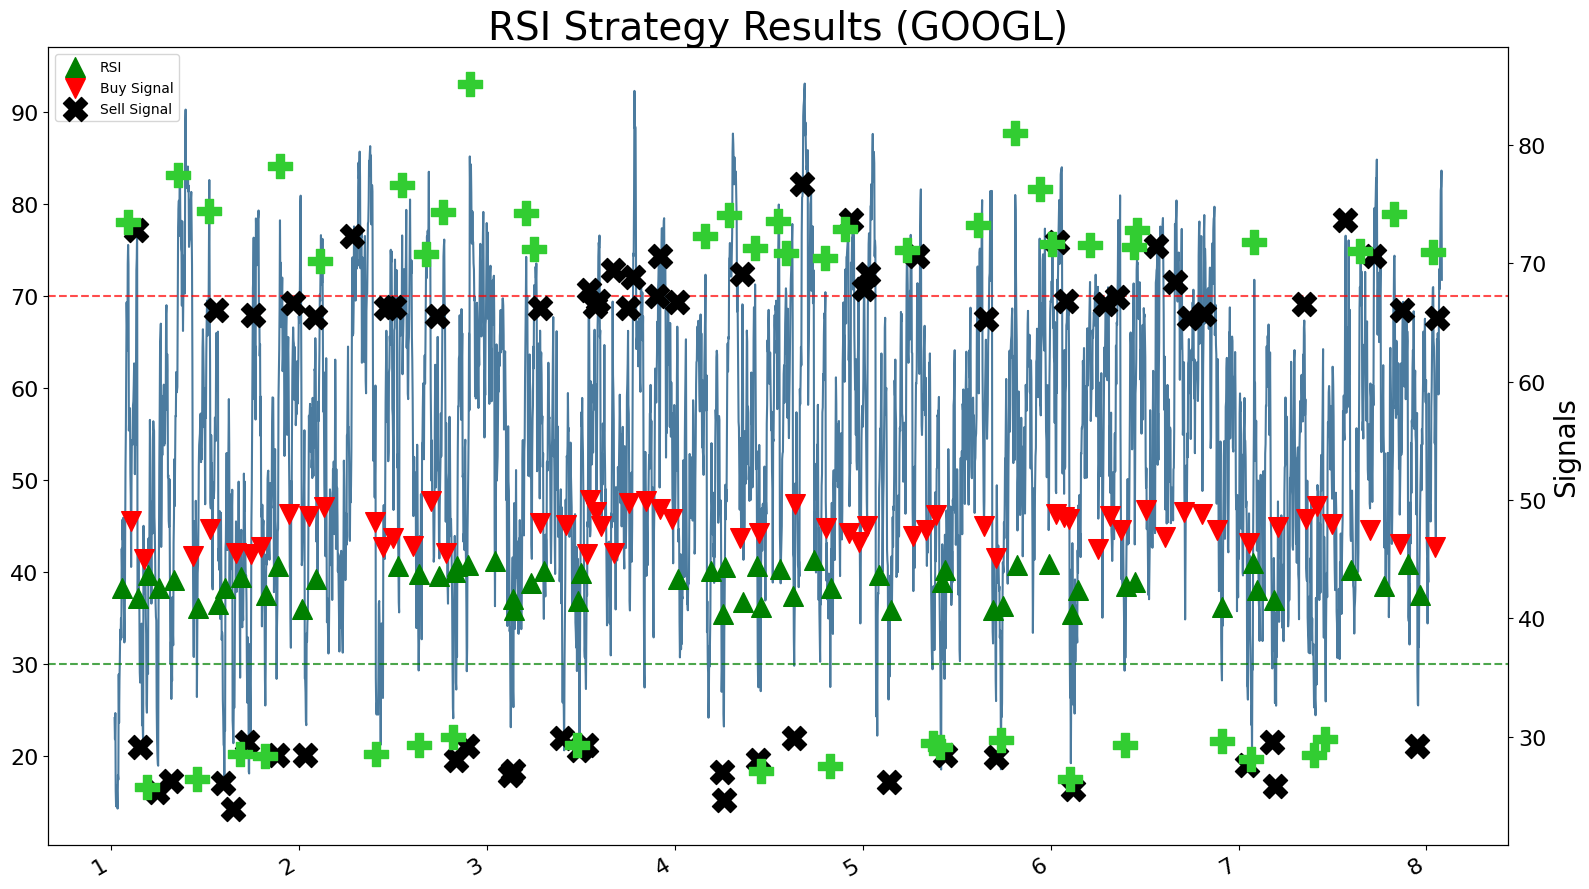

In [7]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(16,9))
ax2 = ax1.twinx() 

# Format x-axis
ax1.set_xticklabels(df.index, rotation=30, ha='right')
ax1.set_xlabel('')

# Plot RSI 
ax1.plot(df['rsi'], color='#4b7b9f')
ax1.axhline(30, color='g', ls='--', alpha=0.7) 
ax1.axhline(70, color='r', ls='--', alpha=0.7)

# Plot trades
ax2.scatter(df.index, df['buy'], marker='^',color='g', s=200, zorder=5)
ax2.scatter(df.index, df['sell'], marker='v', color='r', s=200, zorder=5)
ax2.scatter(df.index, df['Stop_loss'], marker='X', color='black', s=300)
ax2.scatter(df.index, df['Profit'], marker='P', color='limegreen', s=300)

# Set titles 
ax1.set_title('RSI Strategy Results (GOOGL)', size=28)
ax2.set_ylabel('Signals')

# Show counts 
long_trades = df['Profit'].count() 
short_trades = df['Stop_loss'].count()
print(f'Number of profitable trades: {long_trades}') 
print(f'Number of stopped loss trades: {short_trades}')
print(f'Win Rate: {round(long_trades / (long_trades + short_trades) * 100, 2)}%')  

plt.legend(['RSI', 'Buy Signal', 'Sell Signal'], loc='upper left')
fig.tight_layout()
plt.show()

In [8]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

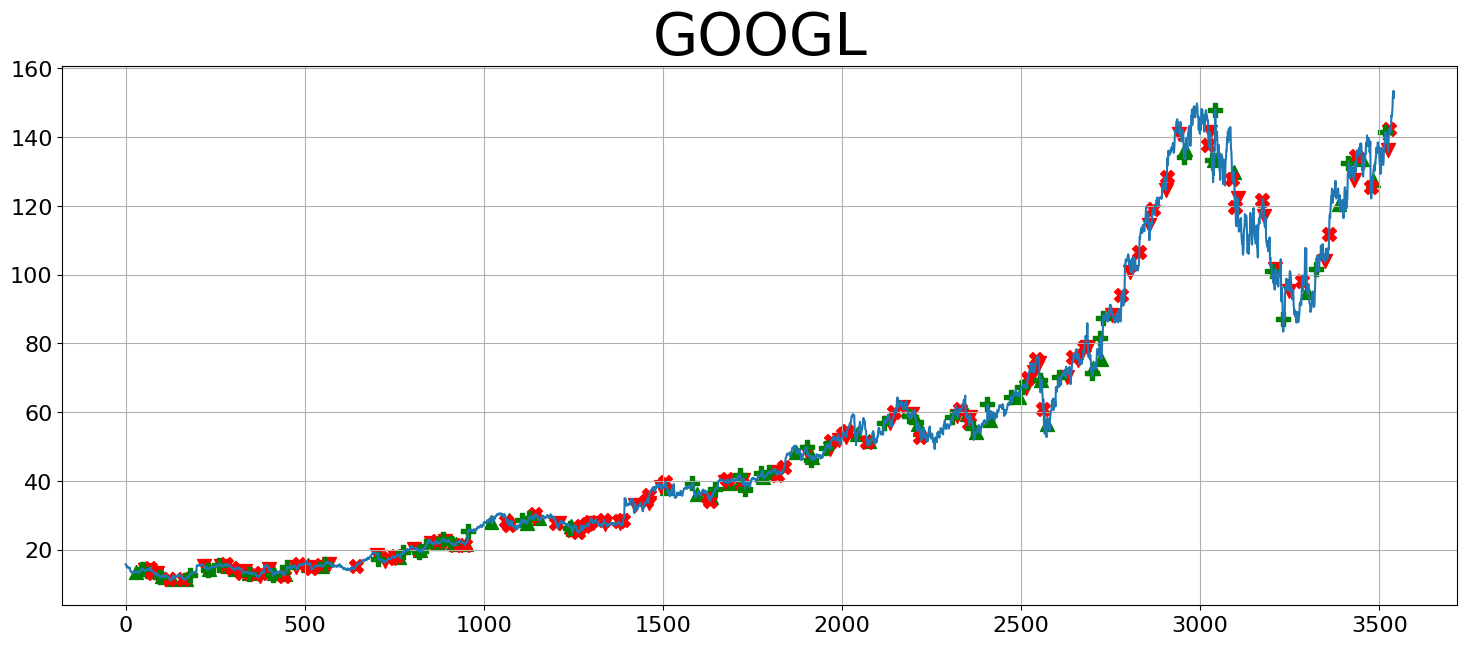

Profit = 49
Stop_loss = 66
PROFITIBLITY 42.608695652173914


In [9]:
df['future_returns'] = df['Close'].pct_change().shift(-3)
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]>=40 and df['rsi'][i]<45.0 and position_Buy!="Buy" and position_Sell!="Sell"   :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50.0 and df['rsi'][i]>45.0 and position_Sell!="Sell" and position_Buy!="Buy"  :
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.title("GOOGL",size=42)

plt.grid()
plt.show()
df.to_csv('azaz.csv')

print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

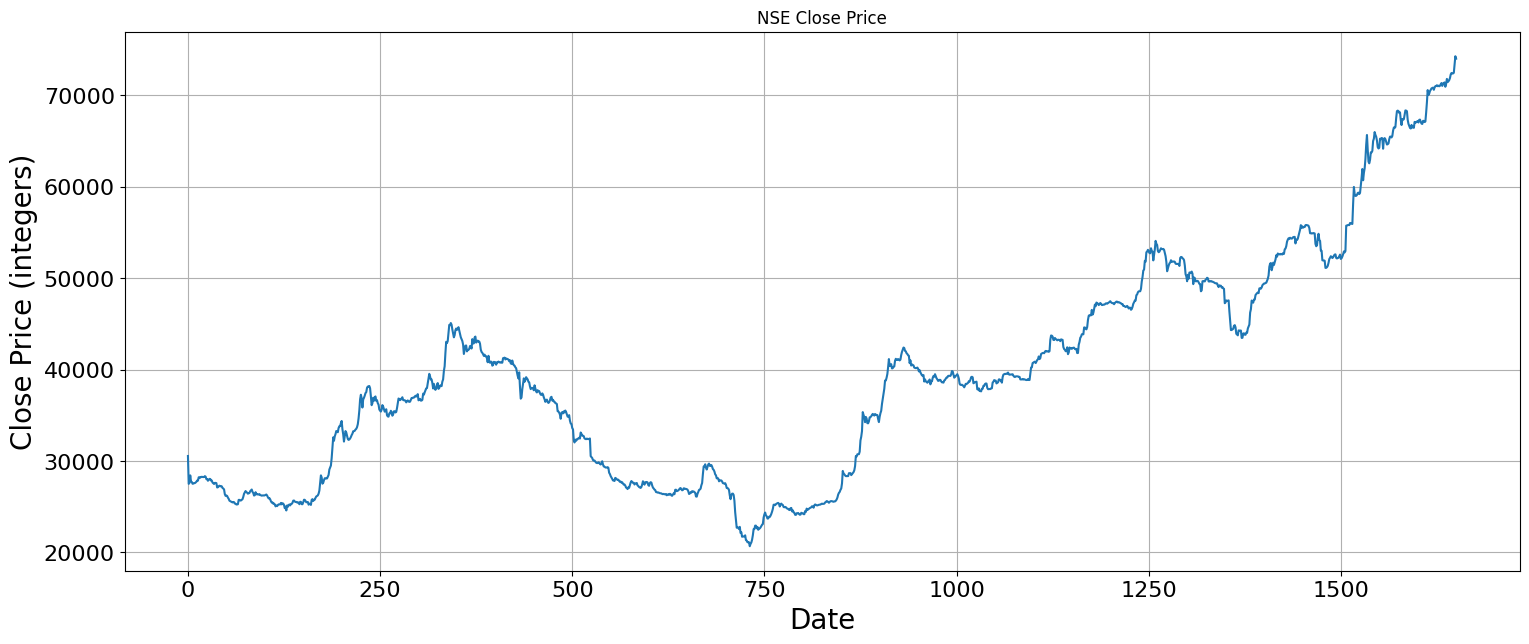

In [10]:
# NSE
df = pd.read_csv('C:\\Users\\Daniel aghanya\\Pictures\\tiktok download\\Final_Year_Project-main\\Uni project\\NSE All Share Historical Data.csv')
df.dropna(inplace=True)
df = df.iloc[::-1].reset_index(drop=True)
df['Close'] = df['Price'].str.replace(',', '').astype(float)
df.head()
# Plot the Close price
plt.figure(figsize=(18,7))
plt.plot(df['Close'])
plt.title('NSE Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (integers)')
plt.grid()
plt.show()

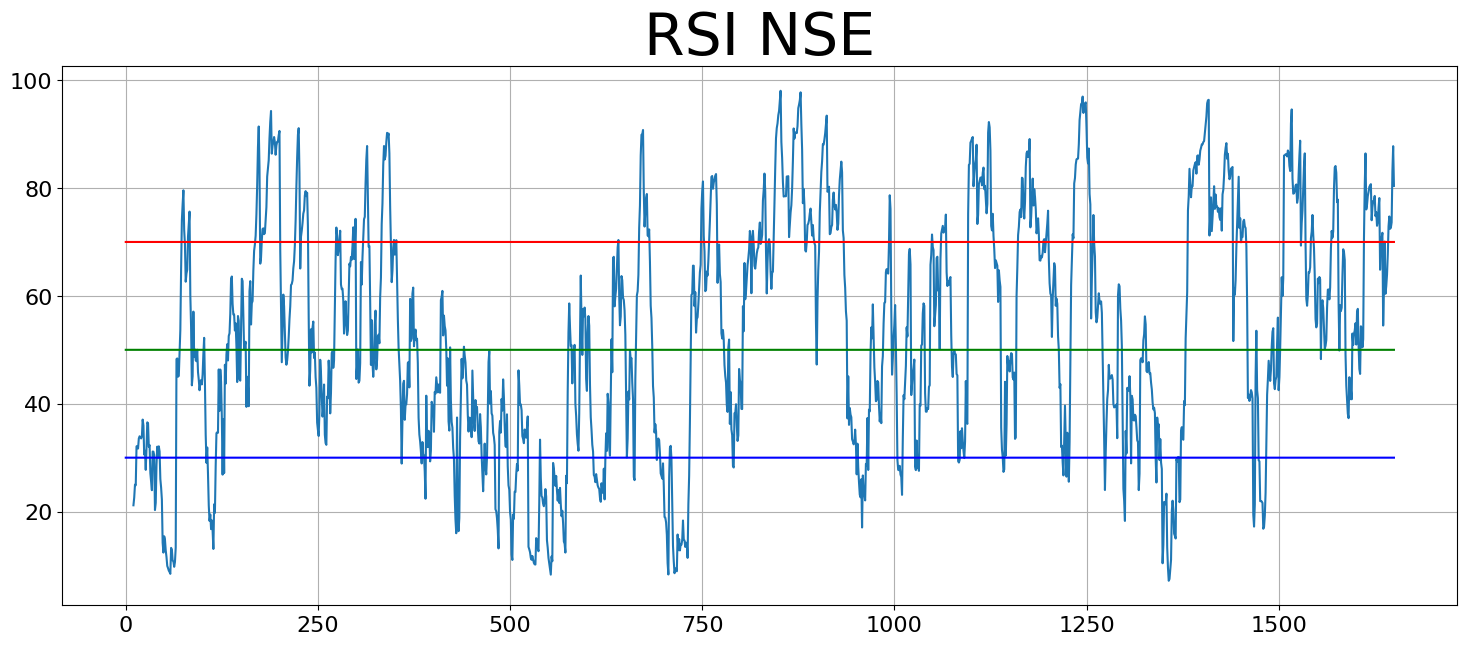

In [11]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)
df['rsi at 70'] = 70
df['rsi at 30'] = 30
df['rsi at 50'] = 50
plt.figure(figsize=(18,7))
plt.plot(df['rsi'] )
plt.plot(df['rsi at 70'],color='r')
plt.plot(df['rsi at 30'],color='b')
plt.plot(df['rsi at 50'],color='g')
plt.title('RSI NSE',size=42)
plt.grid()
plt.show()

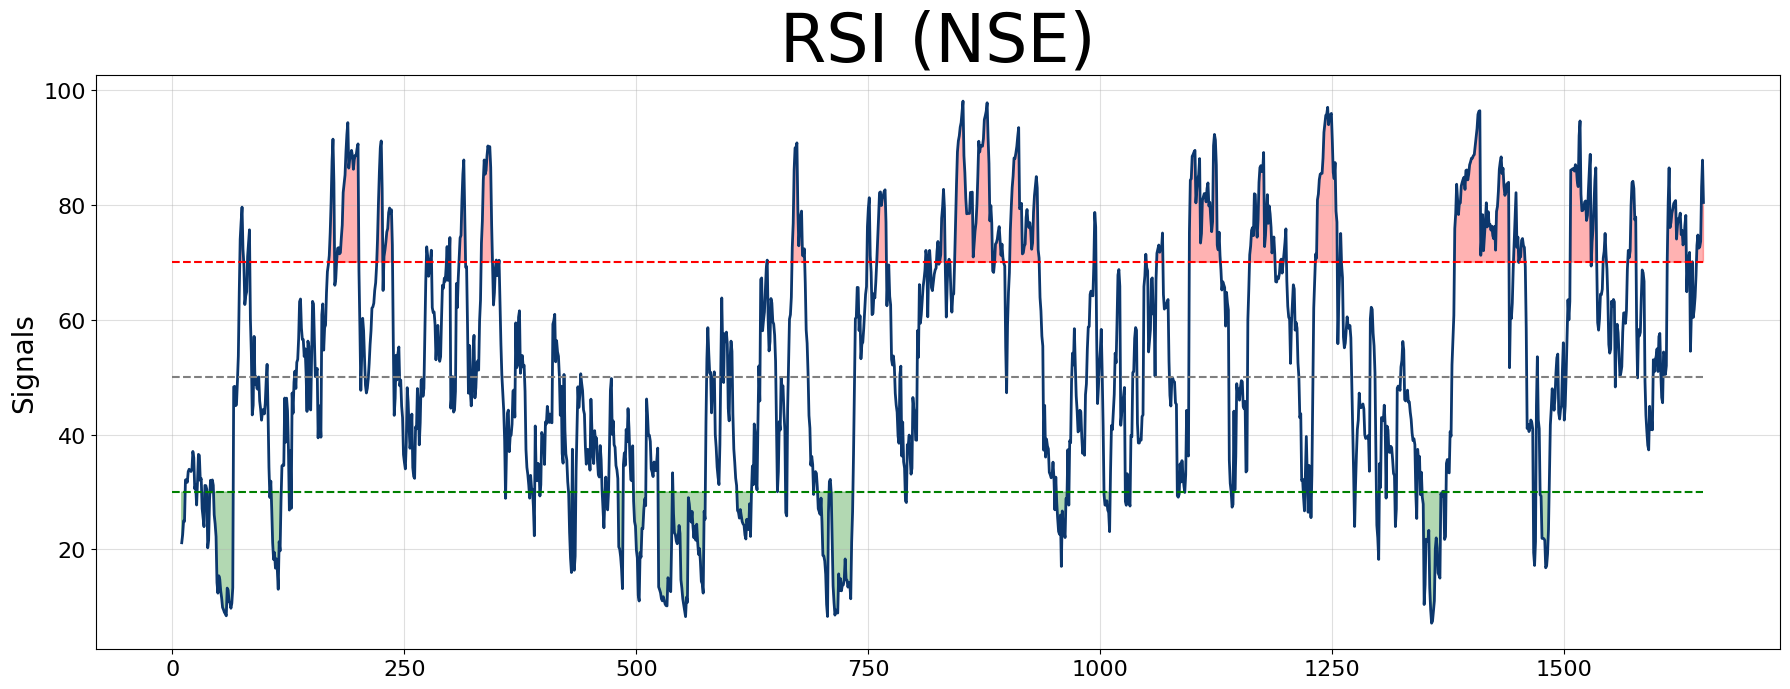

In [12]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)

plt.figure(figsize=(18,7))
plt.plot(df['rsi'], color='#0c376d', linewidth=2)
plt.hlines(70, xmin=df.index[0], xmax=df.index[-1], colors='red', linestyles='dashed')
plt.hlines(30, xmin=df.index[0], xmax=df.index[-1], colors='green', linestyles='dashed') 
plt.hlines(50, xmin=df.index[0], xmax=df.index[-1], colors='grey', linestyles='dashed')

plt.fill_between(df.index, df['rsi'], 70, where=(df['rsi'] >= 70), color='red', alpha=0.3)  
plt.fill_between(df.index, df['rsi'], 30, where=(df['rsi'] <= 30), color='green', alpha=0.3)

plt.gca().set(ylabel='Signals', xlabel='')  
plt.title('RSI (NSE)', fontsize=48)
plt.grid(which='major', axis='both', alpha=0.4)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 16   
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20   

plt.show()

In [13]:

buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

Profit = 21
Stop_loss = 26
PROFITIBLITY 44.680851063829785


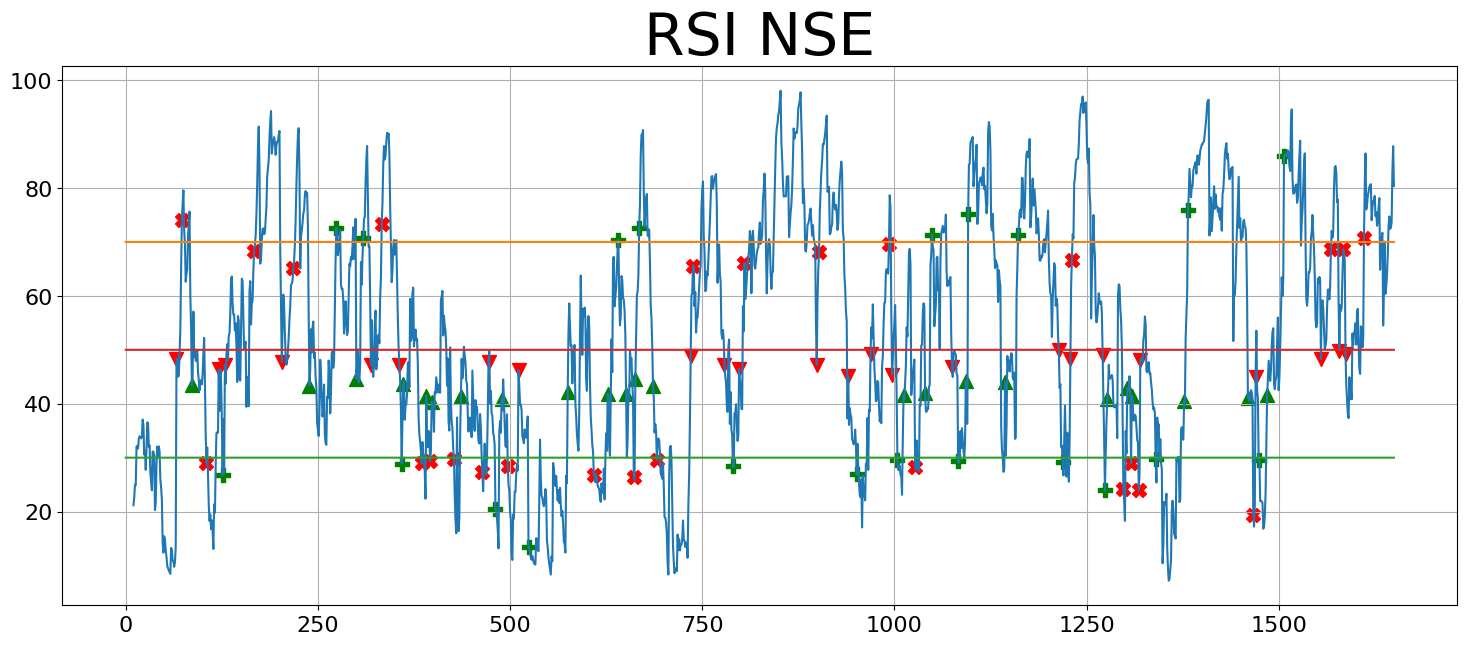

In [14]:

for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]<45 and df['rsi'][i]>=40 and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['rsi'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50 and df['rsi'][i]>45 and position_Sell!="Sell" and position_Buy!="Buy" :
        sell.append(df['rsi'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['rsi'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.plot(df['rsi at 70'])
plt.plot(df['rsi at 30'])
plt.plot(df['rsi at 50'])
plt.title('RSI NSE',size=42)

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [15]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

C:\Users\Daniel aghanya\AppData\Local\Temp\ipykernel_7876\2320245503.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, rotation=30, ha='right')


Number of profitable trades: 21
Number of stopped loss trades: 26
Win Rate: 44.68%


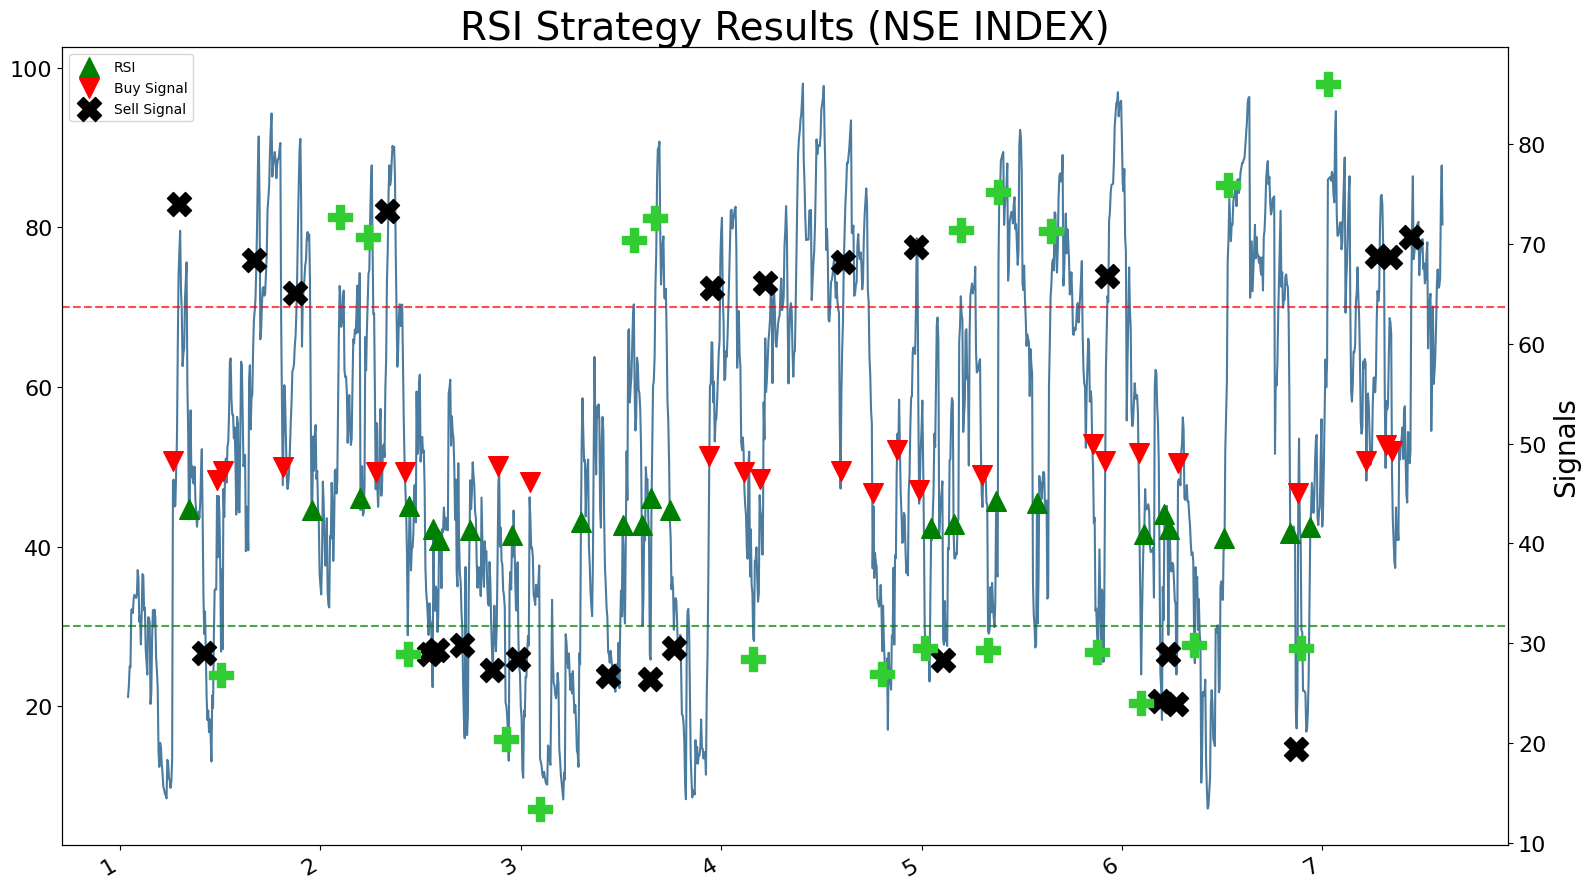

In [16]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(16,9))
ax2 = ax1.twinx() 

# Format x-axis
ax1.set_xticklabels(df.index, rotation=30, ha='right')
ax1.set_xlabel('')

# Plot RSI 
ax1.plot(df['rsi'], color='#4b7b9f')
ax1.axhline(30, color='g', ls='--', alpha=0.7) 
ax1.axhline(70, color='r', ls='--', alpha=0.7)

# Plot trades
ax2.scatter(df.index, df['buy'], marker='^',color='g', s=200, zorder=5)
ax2.scatter(df.index, df['sell'], marker='v', color='r', s=200, zorder=5)
ax2.scatter(df.index, df['Stop_loss'], marker='X', color='black', s=300)
ax2.scatter(df.index, df['Profit'], marker='P', color='limegreen', s=300)

# Set titles 
ax1.set_title('RSI Strategy Results (NSE INDEX)', size=28)
ax2.set_ylabel('Signals')

# Show counts 
long_trades = df['Profit'].count() 
short_trades = df['Stop_loss'].count()
print(f'Number of profitable trades: {long_trades}') 
print(f'Number of stopped loss trades: {short_trades}')
print(f'Win Rate: {round(long_trades / (long_trades + short_trades) * 100, 2)}%')  

plt.legend(['RSI', 'Buy Signal', 'Sell Signal'], loc='upper left')
fig.tight_layout()
plt.show()

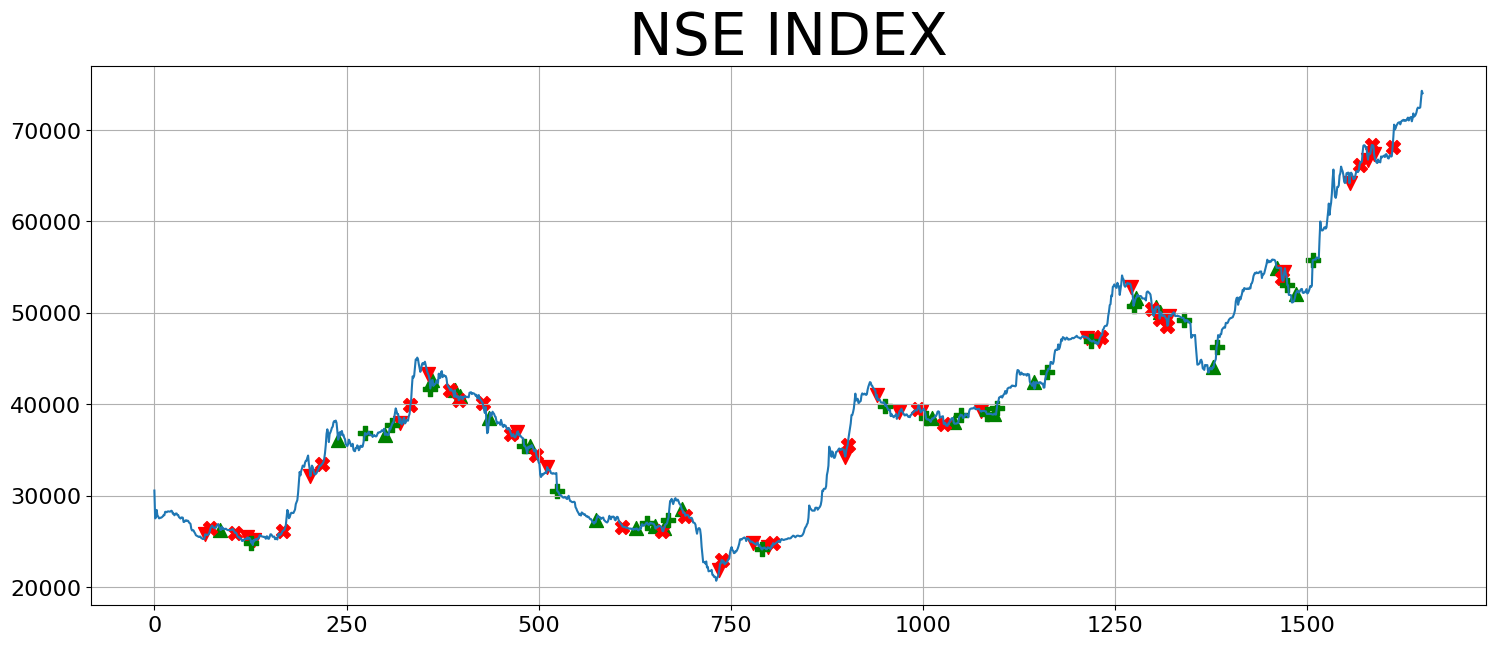

Profit = 21
Stop_loss = 26
PROFITIBLITY 44.680851063829785


In [17]:
df['future_returns'] = df['Close'].pct_change().shift(-3)
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]>=40 and df['rsi'][i]<45.0 and position_Buy!="Buy" and position_Sell!="Sell"   :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50.0 and df['rsi'][i]>45.0 and position_Sell!="Sell" and position_Buy!="Buy"  :
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.title("NSE INDEX",size=42)

plt.grid()
plt.show()
df.to_csv('azaz.csv')

print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")